<a href="https://colab.research.google.com/github/magdakhurtsilava/Python_for_trading-and-collab/blob/main/Portfolio_optimization_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
def symbol_to_path(symbol, base_dir='/content/'):
  return os.path.join(base_dir, f'{symbol}.csv')

In [3]:
symbols = ['AAPL', 'AMZN', 'GOOG', 'TSLA']

def get_data(symbols, dates):
  df = pd.DataFrame(index=dates)
  if 'AAPL' not in symbols:
    symbols.insert(0, 'AAPL')

  for symbol in symbols:
    df_temp=pd.read_csv(
       symbol_to_path(symbol),
       index_col='Date',
       parse_dates=True,
       usecols=['Date', 'Adj Close'],
       na_values=['nan']
  )
    
    df_temp = df_temp.rename(columns={'Adj Close': symbol})
    df = df.join(df_temp)
    df= df.dropna()

  return df


In [ ]:
dates = pd.date_range('2021-01-01', '2021-01-10')
get_data(symbols, dates)

In [5]:
def main():
  dates = pd.date_range('2021-01-01', '2021-01-10')
  symbols = ['AAPL', 'AMZN', 'GOOG', 'TSLA']
  df = get_data(symbols, dates)
  print(df.mean())
  print(df.median())
  print(df.std())

if __name__=='__main__':
  main()

FileNotFoundError: ignored

In [6]:
def get_rolling_mean(values, window):
  return values.rolling(window).mean()

In [7]:
def get_rolling_std(values, window):
  return values.rolling(window).std()

In [8]:
def get_bollinger_band(rm, rstd):
  upper_band = rm * rstd * 2
  lower_band = rm - rstd * 2
  return upper_band, lower_band

In [9]:
def main():
  dates = pd.date_range('2021-01-01', '2021-10-10')
  symbols = ['AAPL', 'AMZN', 'GOOG', 'TSLA']
  df = get_data(symbols, dates)

  ax = df['AAPL'].plot(title='AAPL rolling mean', label='AAPL price')
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')

  rm_AAPL = df['AAPL'].rolling(window=20).mean()
  rm_AAPL.plot(label='Rolling mean', ax=ax)
  ax.legend()

if __name__=='__main__':
  main()




FileNotFoundError: ignored

In [10]:
def main():
  dates = pd.date_range('2021-01-01', '2021-10-10')
  symbols = ['AAPL', 'AMZN', 'GOOG', 'TSLA']
  df = get_data(symbols, dates)

  ax = df['AAPL'].plot(title='AAPL standard deviation', label='AAPL price')
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')

  rm_AAPL = df['AAPL'].rolling(window=20).std()
  rm_AAPL.plot(label='Standard deviation', ax=ax)
  ax.legend()

if __name__=='__main__':
  main()



FileNotFoundError: ignored

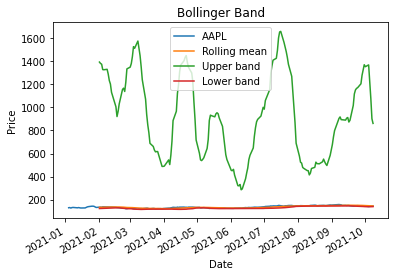

In [ ]:
def main():
  dates = pd.date_range('2021-01-01', '2021-10-10')
  symbols = ['AAPL']
  df = get_data(symbols, dates)

  rm_AAPL = get_rolling_mean(df['AAPL'], window=20)

  rstd_AAPL = get_rolling_std(df['AAPL'], window=20)

  upper_band, lower_band = get_bollinger_band(rm_AAPL, rstd_AAPL)

  ax = df['AAPL'].plot(title='Bollinger Band', label='AAPL')
  rm_AAPL.plot(label='Rolling mean', ax=ax)
  upper_band.plot(label='Upper band', ax=ax)
  lower_band.plot(label='Lower band', ax=ax)

  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.legend()

if __name__=='__main__':
  main()